In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("googleplaystore.csv") # Load the Dataset

In [ ]:
data.tail(10) # Print last 10 Rows only

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
print(data.columns) # Print all the columns name

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [ ]:
data.dtypes # Print the Data Types of Each column

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
data.shape

(10841, 13)

In [ ]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


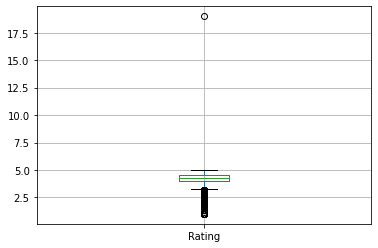

In [ ]:
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5b4421790>]],
      dtype=object)

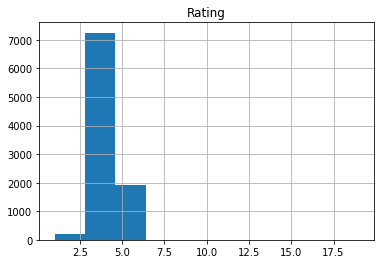

In [ ]:
data.hist()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum() # prepocessing steps

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
data.drop([10472],inplace=True)

In [ ]:
data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


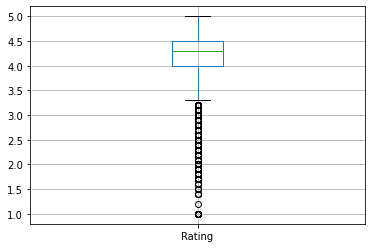

In [ ]:
data.boxplot()


In [ ]:
data.shape

(10840, 13)

In [ ]:
data.isnull().sum() # Find the missing values in Each Column:

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# Find the missing values from Rating Column and repalce by Median value
# user Defined function
def impute_median(series):
    return series.fillna(series.median())

In [ ]:
# Apply user defined function into Rating Column:
data.Rating=data['Rating'].transform(impute_median)

In [ ]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
print(data['Type'].mode())

0    Free
dtype: object


In [ ]:
print(data['Current Ver'].mode())

0    Varies with device
dtype: object


In [ ]:
print(data['Android Ver'].mode())


0    4.1 and up
dtype: object


In [ ]:
# Find the Null values from Type Column and Replace by Mode
data['Type'].fillna(str(data['Type'].mode().values[0]),inplace=True)

In [ ]:
# Find the Null values from Current Ver Column and Replace by Mode
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]),inplace=True)


In [ ]:
# # Find the Null vaues from Andtroid Ver Column and Replace by Mode
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]),inplace=True)


In [ ]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# convet price and review and rating into numerical Column
data['Price']=data['Price'].apply(lambda x: str(x).replace('$','')if '$' in str(x) else str(x))


In [ ]:
data['Price']=data['Price'].apply(lambda x: float(x))

In [ ]:
data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [ ]:
data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')

In [ ]:
data['Installs']=data['Installs'].apply(lambda x: str(x).replace('+','')if '+' in str(x) else str(x))

In [ ]:
data['Installs']=data['Installs'].apply(lambda x: str(x).replace(',','')if ',' in str(x) else str(x))
data['Installs']=data['Installs'].apply(lambda x: float(x))

In [ ]:
data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [ ]:
# Group the App Based on the Category
grp=data.groupby('Category')
x=grp['Rating'].agg(np.mean)

4.3953125


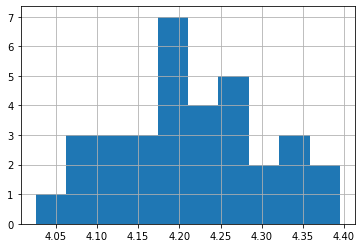

In [ ]:
result = sorted(x.items(), key=lambda x: x[1], reverse=True)[:5]
print
import operator
result1=dict(sorted(x.items(), key=operator.itemgetter(1), reverse=True)[:5])
print(x.max())
x.hist()

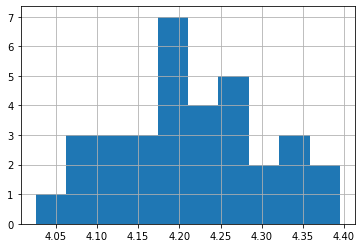

In [ ]:
x.hist()
y=grp['Price'].agg(np.sum)
result1 = sorted(y.items(), key=lambda x: x[1], reverse=True)[:5]


In [ ]:
print(result1)

[('FINANCE', 2900.83), ('FAMILY', 2434.78), ('LIFESTYLE', 2360.87), ('MEDICAL', 1439.96), ('GAME', 287.3)]


In [ ]:
z=grp['Reviews'].agg(np.mean)
result2 = sorted(z.items(), key=lambda x: x[1], reverse=True)[:5]
print(z)


Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

In [ ]:
print(result2)

[('COMMUNICATION', 2107137.622739018), ('SOCIAL', 2105903.125423729), ('GAME', 1385858.6966783216), ('PHOTOGRAPHY', 637363.1343283582), ('VIDEO_PLAYERS', 630743.9314285715)]


In [ ]:
print(x)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

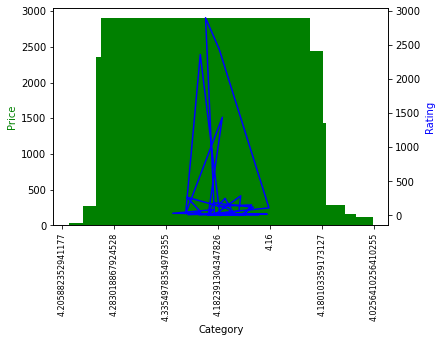

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x,y, color='g')
ax2.plot(x, y, 'b')
ax1.set_xlabel('Category')
ax1.set_ylabel('Price', color='g')
ax2.set_ylabel('Rating', color='b')
ax1.set_xticklabels(x,rotation='vertical',size=8)
plt.show()

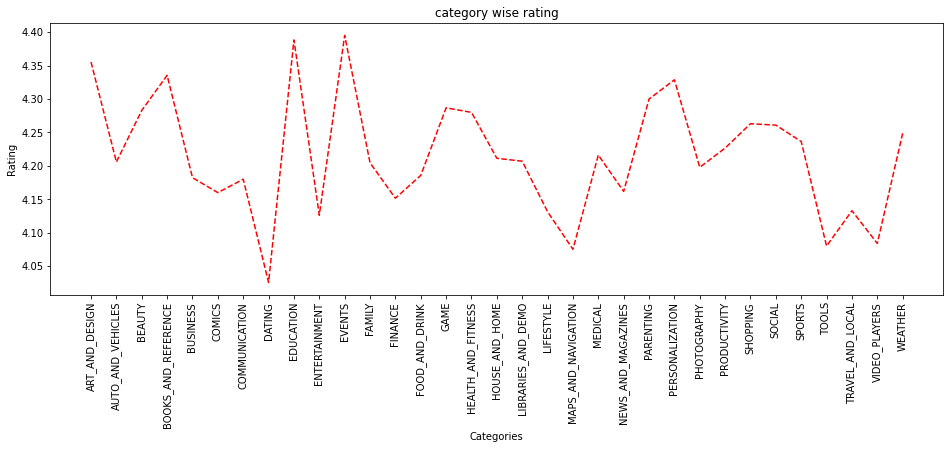

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(x,'r--',color='r')
plt.xticks(rotation=90)
plt.title("category wise rating")
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()


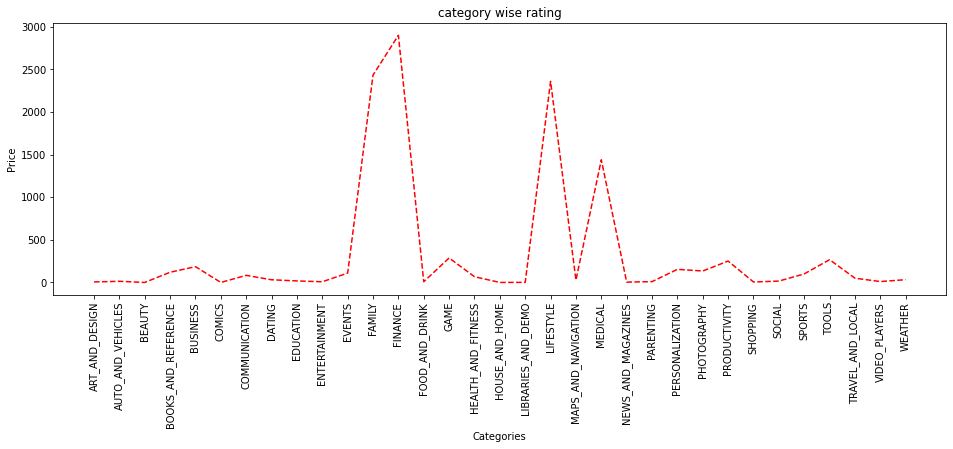

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='r')
plt.xticks(rotation=90)
plt.title("category wise rating")
plt.xlabel('Categories')
plt.ylabel('Price')
plt.show()



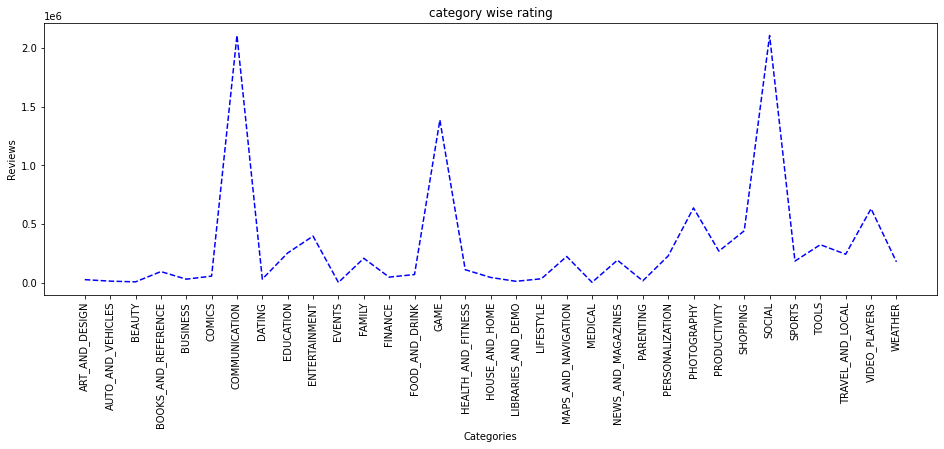

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(z,'r--',color='b')
plt.xticks(rotation=90)
plt.title("category wise rating")
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()

In [ ]:
print(result1)

[('FINANCE', 2900.83), ('FAMILY', 2434.78), ('LIFESTYLE', 2360.87), ('MEDICAL', 1439.96), ('GAME', 287.3)]


In [ ]:
print(result2)

[('COMMUNICATION', 2107137.622739018), ('SOCIAL', 2105903.125423729), ('GAME', 1385858.6966783216), ('PHOTOGRAPHY', 637363.1343283582), ('VIDEO_PLAYERS', 630743.9314285715)]
